In [1]:
import pandas as pd
df=pd.read_csv("housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

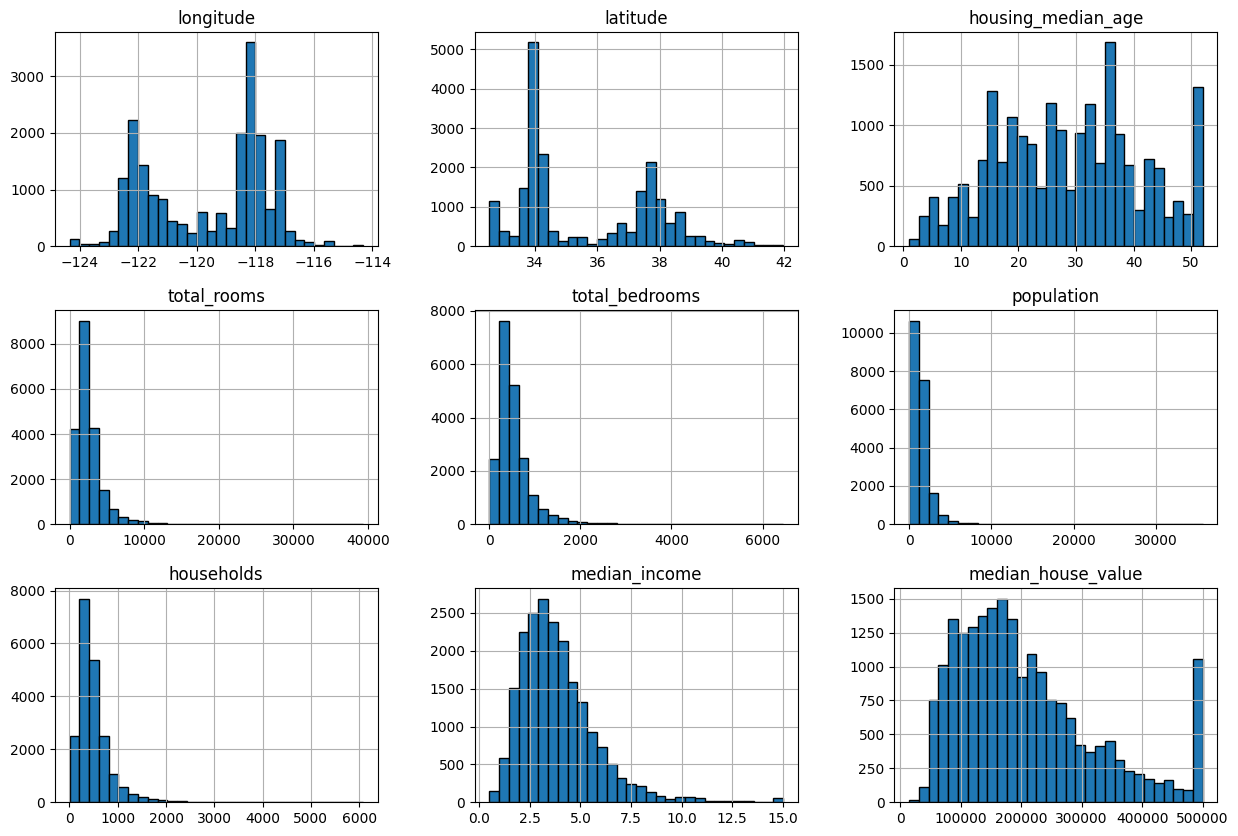

In [13]:
df.hist(figsize=(15,10),bins=30,edgecolor="Black")

TypeError: cannot convert the series to <class 'float'>

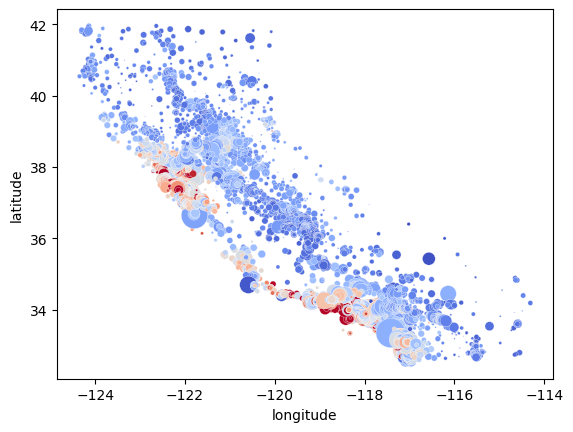

In [20]:
import seaborn as sb
#sb.scatterplot(x="longitude",y="latitude",data=df[df["median_income"]>10],hue="median_house_value",palette="coolwarm")
sb.scatterplot(x="longitude",y="latitude",data=df,hue="median_house_value",palette="coolwarm",s=df["population"]/80)

In [21]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [23]:
df_na=df.dropna()
df_na.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [25]:
dummies=pd.get_dummies(df["ocean_proximity"],dtype=int)

In [26]:
df_na=df_na.join(dummies)

In [27]:
df_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [29]:
df_na=df_na.drop(["ocean_proximity"],axis=1)

In [31]:
df_na.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


<Axes: >

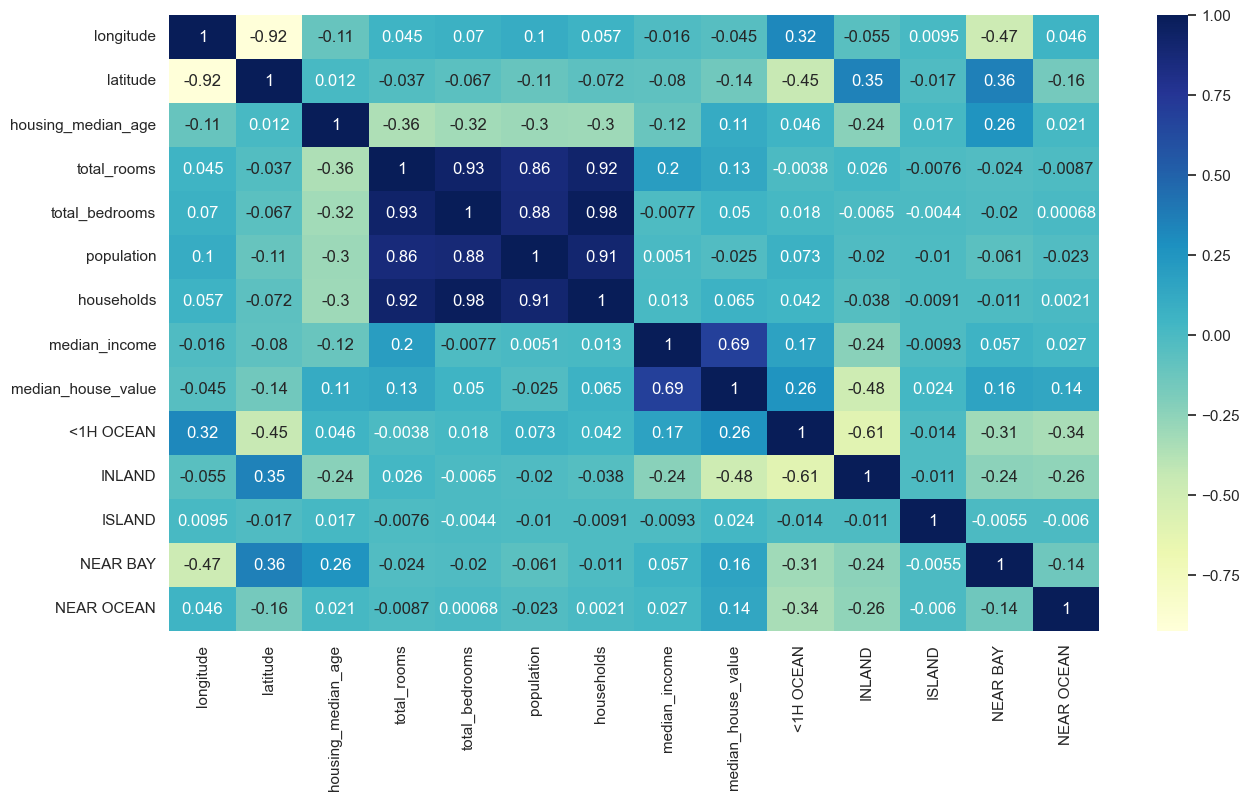

In [34]:
sb.set(rc={"figure.figsize":(15,8)})
sb.heatmap(df_na.corr(),annot=True,cmap="YlGnBu")

In [35]:
df_na.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

In [36]:
df_na["ration_bedrooms"]=df["total_bedrooms"]/df["total_rooms"]

<Axes: >

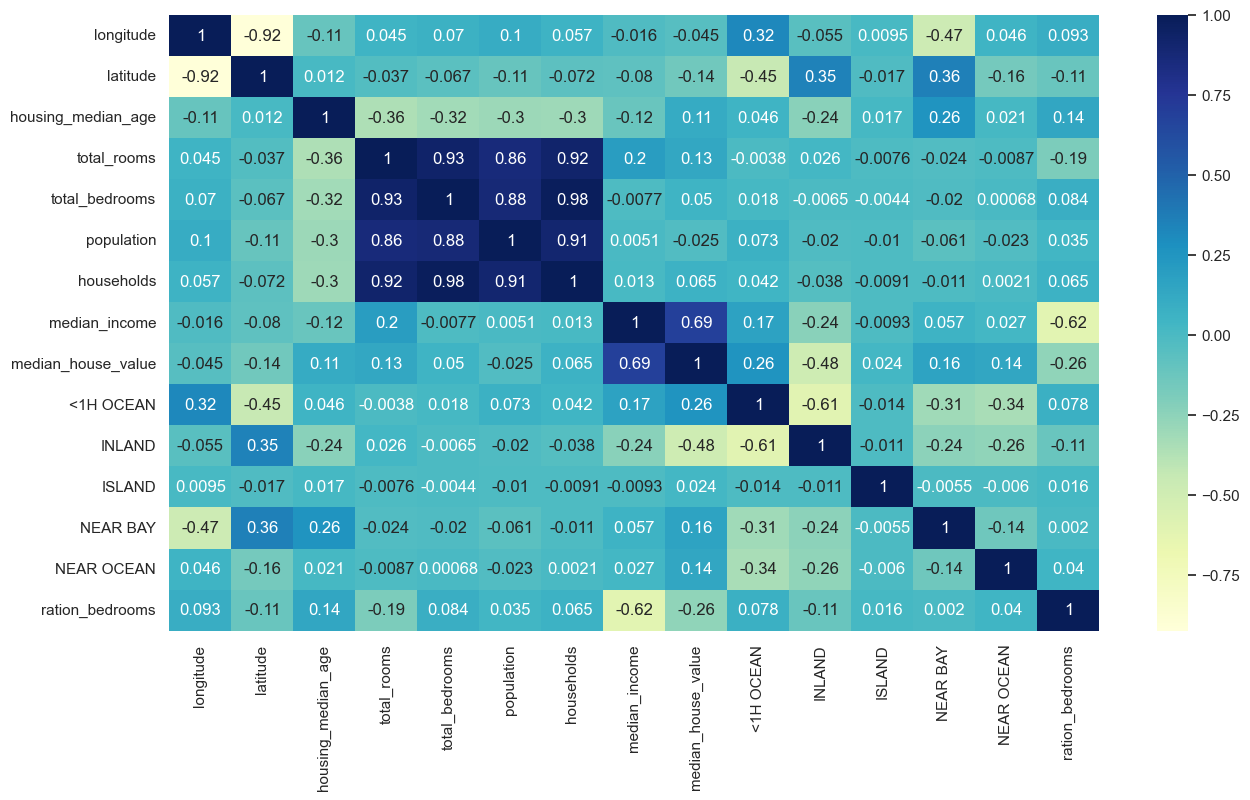

In [37]:
sb.set(rc={"figure.figsize":(15,8)})
sb.heatmap(df_na.corr(),annot=True,cmap="YlGnBu")

In [55]:
X=df_na.drop(["median_house_value"],axis=1)
y=df_na["median_house_value"]

In [56]:
from sklearn.model_selection import train_test_split
X_ent,X_pru,y_ent,y_pru=train_test_split(X,y,test_size=.2)

In [58]:
X_ent.shape

(16346, 14)

In [59]:
from sklearn.linear_model import LinearRegression
modelo=LinearRegression()

In [60]:
modelo.fit(X_ent,y_ent)

LinearRegression()

In [61]:
modelo.score(X_ent,y_ent)

0.6491203270727163

In [62]:
modelo.score(X_pru,y_pru)

0.662721695178133

In [63]:
prediccion=modelo.predict(X_pru)

comparativa={
    "Prediccion":prediccion,
    "Valor Real":y_pru
}
comparacion=pd.DataFrame(comparativa)

In [64]:
comparacion.tail(20)

,Prediccion,Valor Real
15352,169289.608026,102300.0
16036,236389.948586,221500.0
17748,251596.720797,221000.0
9205,88434.027053,147800.0
4239,267763.386261,434400.0
20266,228802.229518,213900.0
15312,158113.711281,106300.0
2545,138990.408009,68300.0
16966,282274.750710,354100.0
4074,519427.473421,500001.0


In [109]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_pru,prediccion)
mse

4554154775.817572

In [110]:
import numpy as np
rmse=np.sqrt(mse)
rmse

67484.47803619415

In [111]:
df_na.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,ration_bedrooms
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
from sklearn.preprocessing import StandardScaler
escalado=StandardScaler()

In [120]:
X_pru_esc=escalado.fit_transform(X_pru)
X_ent_esc=escalado.fit_transform(X_ent)

In [123]:
pd.DataFrame(X_pru_esc)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.596961,-0.830932,0.417694,-0.124990,-0.225480,-0.436646,-0.164552,0.978075,1.128869,-0.684514,-0.022127,-0.344239,-0.394748,-0.454875
1,1.108097,-1.144907,0.816553,-0.491290,-0.583260,-0.505199,-0.498663,-0.518337,-0.885842,-0.684514,-0.022127,-0.344239,2.533263,-0.436513
2,0.026274,0.397265,-1.018198,0.028721,-0.289454,-0.276968,-0.332903,0.185127,-0.885842,1.460891,-0.022127,-0.344239,-0.394748,-1.061771
3,-0.728024,2.110276,-0.459795,-0.679609,-0.739641,-1.021853,-1.076236,-0.200034,-0.885842,1.460891,-0.022127,-0.344239,-0.394748,-0.230752
4,1.098172,-1.135673,-0.220480,-0.544774,-0.358167,-0.387322,-0.475353,-1.320110,-0.885842,-0.684514,-0.022127,-0.344239,2.533263,1.046135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,-1.392998,2.290350,-1.576600,0.968517,0.833644,0.605858,0.943972,-0.382158,-0.885842,1.460891,-0.022127,-0.344239,-0.394748,-0.486750
4083,1.162684,-0.697031,0.098607,-0.390614,-0.372383,-0.373946,-0.395063,-0.298665,-0.885842,1.460891,-0.022127,-0.344239,-0.394748,0.040371
4084,-2.107596,1.754745,1.454727,-0.669271,-0.694622,-0.740118,-0.775794,-0.716293,1.128869,-0.684514,-0.022127,-0.344239,-0.394748,-0.004960
4085,0.522523,-0.678562,-0.539567,0.332997,0.599073,0.636791,0.612451,-0.687035,1.128869,-0.684514,-0.022127,-0.344239,-0.394748,0.383479
